In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize

def convert_to_canonical_smiles(smiles):
    try:
        # Convert input SMILES to an RDKit molecule object
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return "Invalid SMILES string"
        # Convert the molecule to a canonical SMILES string
        canonical_smiles = Chem.MolToSmiles(mol, canonical=True)
        return canonical_smiles
    except Exception as e:
        return f"Error: {e}"

def normalize_tautomers(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return None
        # Normalize the molecule (tautomer handling included)
        normalizer = rdMolStandardize.Normalize()
        mol = normalizer.normalize(mol)
        return Chem.MolToSmiles(mol, canonical=True)
    except Exception as e:
        return None

def normalize_tautomers(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return None
        # Normalize the molecule (tautomer handling included)
        normalizer = rdMolStandardize.Normalize()
        mol = normalizer.normalize(mol)
        return Chem.MolToSmiles(mol, canonical=True)
    except Exception as e:
        return None

def remove_salts(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return None
        # Remove small fragments or salts
        fragment_remover = rdMolStandardize.FragmentRemover()
        mol = fragment_remover.remove(mol)
        return Chem.MolToSmiles(mol, canonical=True)
    except Exception as e:
        return None


def neutralize_charges(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return None
        # Neutralize charges
        uncharger = rdMolStandardize.Uncharger()
        mol = uncharger.uncharge(mol)
        return Chem.MolToSmiles(mol, canonical=True)
    except Exception as e:
        return None

def standardize_functional_groups(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return None
        # Apply template-based transformations if needed
        # Example: Aromatization
        AllChem.Kekulize(mol, clearAromaticFlags=True)
        return Chem.MolToSmiles(mol, canonical=True)
    except Exception as e:
        return None

def add_hydrogens(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return None
        mol = Chem.AddHs(mol)
        return Chem.MolToSmiles(mol, canonical=True)
    except Exception as e:
        return None

def standardize_stereochemistry(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return None
        Chem.AssignStereochemistry(mol, cleanIt=True, force=True)
        return Chem.MolToSmiles(mol, canonical=True)
    except Exception as e:
        return None

def standardize_smiles_pipeline(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return None
        uncharger = rdMolStandardize.Uncharger()
        fragment_remover = rdMolStandardize.FragmentRemover()
    
        # Normalize, remove salts, uncharge, and canonicalize
        mol = normalize_smiles(smiles)
        mol = fragment_remover.remove(mol)
        mol = uncharger.uncharge(mol)
        return Chem.MolToSmiles(mol, canonical=True)
    except Exception as e:
        return f"Error: {e}"

def validate_smiles(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        return smiles  # True if valid, False otherwise
    except Exception as e:
        return False

# Define the function to normalize a SMILES string
def normalize_smiles(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return "Invalid SMILES string"
        # Create a normalizer object
        normalizer = rdMolStandardize.Normalizer()
        # Normalize the molecule
        normalized_mol = normalizer.normalize(mol)
        return normalized_mol #Chem.MolToSmiles(normalized_mol, canonical=True)
    except Exception as e:
        return f"Error: {e}"

In [3]:
input_path = "D:/PropPredictionModel/PropPredictionModel/tests/toxicity/data/train_tox_data.csv"
train_df = pd.read_csv(input_path)
train_df['Labels'].value_counts()

Labels
0    6760
1     937
Name: count, dtype: int64

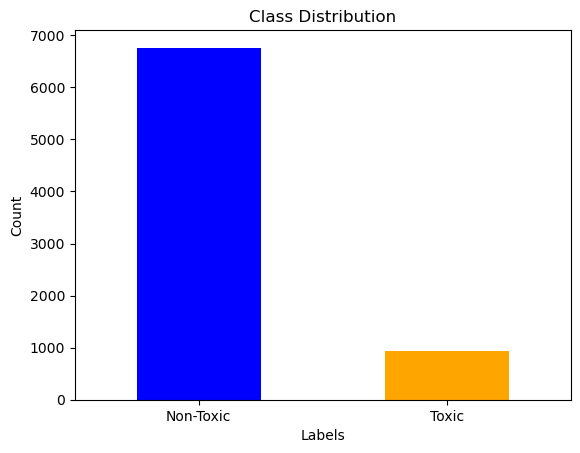

In [4]:
train_df['Labels'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Toxic', 'Toxic'], rotation=0)
plt.show()

In [5]:
train_df['SMILES'] = train_df['SMILES'].apply(validate_smiles)
train_cleaned = train_df.dropna(subset=['SMILES'])
print(len(train_cleaned),len(train_df))

[23:06:43] Explicit valence for atom # 2 Cl, 2, is greater than permitted
[23:06:43] Explicit valence for atom # 3 Si, 8, is greater than permitted
[23:06:43] Explicit valence for atom # 0 Cl, 2, is greater than permitted
[23:06:43] WARNING: not removing hydrogen atom without neighbors


7697 7697


In [6]:
train_cleaned['Canonical_SMILES'] = train_cleaned['SMILES'].apply(convert_to_canonical_smiles)
train_cleaned = train_cleaned.dropna(subset=['Canonical_SMILES'])
print(len(train_cleaned))

[23:06:45] Explicit valence for atom # 2 Cl, 2, is greater than permitted
[23:06:46] Explicit valence for atom # 3 Si, 8, is greater than permitted
[23:06:46] Explicit valence for atom # 0 Cl, 2, is greater than permitted


7697


[23:06:46] WARNING: not removing hydrogen atom without neighbors


In [7]:
train_cleaned['Standardized_SMILES'] = train_cleaned['Canonical_SMILES'].apply(standardize_smiles_pipeline)
print(len(train_cleaned))

[23:06:46] Initializing Normalizer
[23:06:46] Running Normalizer
[23:06:46] Running FragmentRemover
[23:06:46] Removed fragment: hexafluorophosphate
[23:06:46] Running Uncharger
[23:06:46] Initializing Normalizer
[23:06:46] Running Normalizer
[23:06:46] Running FragmentRemover
[23:06:46] Running Uncharger
[23:06:46] Initializing Normalizer
[23:06:46] Running Normalizer
[23:06:46] Running FragmentRemover
[23:06:46] Running Uncharger
[23:06:46] Initializing Normalizer
[23:06:46] Running Normalizer
[23:06:46] Running FragmentRemover
[23:06:46] Running Uncharger
[23:06:46] Initializing Normalizer
[23:06:46] Running Normalizer
[23:06:46] Running FragmentRemover
[23:06:46] Running Uncharger
[23:06:46] Initializing Normalizer
[23:06:46] Running Normalizer
[23:06:46] Running FragmentRemover
[23:06:46] Running Uncharger
[23:06:46] Initializing Normalizer
[23:06:46] Running Normalizer
[23:06:46] Running FragmentRemover
[23:06:46] Running Uncharger
[23:06:46] Initializing Normalizer
[23:06:46] Ru

7697


[23:07:15] Running FragmentRemover
[23:07:15] Running Uncharger
[23:07:15] Initializing Normalizer
[23:07:15] Running Normalizer
[23:07:15] Running FragmentRemover
[23:07:15] Running Uncharger
[23:07:15] Initializing Normalizer
[23:07:15] Running Normalizer
[23:07:15] Running FragmentRemover
[23:07:15] Running Uncharger
[23:07:15] Initializing Normalizer
[23:07:15] Running Normalizer
[23:07:15] Running FragmentRemover
[23:07:15] Running Uncharger
[23:07:15] Initializing Normalizer
[23:07:15] Running Normalizer
[23:07:15] Running FragmentRemover
[23:07:15] Removed fragment: sulfate
[23:07:15] Running Uncharger
[23:07:15] Initializing Normalizer
[23:07:15] Running Normalizer
[23:07:15] Running FragmentRemover
[23:07:15] Running Uncharger


In [8]:
d1 = pd.read_csv("D:/Equivarance_property_prediction/data/toxric_30_datasets/CYP450_CYP3A4.csv")
d2 = pd.read_csv("D:/Equivarance_property_prediction/data/toxric_30_datasets/CYP450_CYP2D6.csv")
d3 = pd.read_csv("D:/Equivarance_property_prediction/data/toxric_30_datasets/CYP450_CYP2C19.csv")
d4 = pd.read_csv("D:/Equivarance_property_prediction/data/toxric_30_datasets/CYP450_CYP2C9.csv")
d5 = pd.read_csv("D:/Equivarance_property_prediction/data/toxric_30_datasets/CYP450_CYP1A2.csv")

In [9]:
d3.head()

TAID                 Name  \
0   TOX-75            minoxidil   
1   TOX-90     dichlorphenamide   
2   TOX-94          allopurinol   
3   TOX-98  hydrochlorothiazide   
4  TOX-110          niclosamide   

                                          IUPAC Name  PubChem CID  \
0  3-hydroxy-2-imino-6-piperidin-1-ylpyrimidin-4-...       4201.0   
1              4,5-dichlorobenzene-1,3-disulfonamide       3038.0   
2          1,5-dihydropyrazolo[3,4-d]pyrimidin-4-one  135401907.0   
3  6-chloro-1,1-dioxo-3,4-dihydro-2H-1lambda6,2,4...       3639.0   
4  5-chloro-N-(2-chloro-4-nitrophenyl)-2-hydroxyb...       4477.0   

                              Canonical SMILES                     InChIKey  \
0                Nc1cc(N2CCCCC2)nc(N)[n+]1[O-]  ZIMGGGWCDYVHOY-UHFFFAOYSA-N   
1       NS(=O)(=O)c1cc(Cl)c(Cl)c(S(N)(=O)=O)c1  GJQPMPFPNINLKP-UHFFFAOYSA-N   
2                            Oc1ncnc2[nH]ncc12  OFCNXPDARWKPPY-UHFFFAOYSA-N   
3           NS(=O)(=O)c1cc2c(cc1Cl)NCNS2(=O)=O  JZUFKLXOESDKRF-UHFFFAOYSA-N   
4  O=C(Nc1ccc([N+](=O)[O-])cc1Cl)c1cc(Cl)ccc1O  RJMUSRYZPJIFPJ-UHFFFAOYSA-N   

   Toxicity Value  
0               0  
1               0  
2               0  
3               0  
4               0

In [10]:
d3['Canonical SMILES'] = d3['Canonical SMILES'].apply(validate_smiles)
d3_cleaned = d3.dropna(subset=['Canonical SMILES'])
print(len(d3_cleaned),len(d3))
d3_cleaned['Standardized_SMILES'] = d3_cleaned['Canonical SMILES'].apply(standardize_smiles_pipeline)
print(len(d3_cleaned))

10530 10530


[23:07:19] Initializing Normalizer
[23:07:19] Running Normalizer
[23:07:19] Running FragmentRemover
[23:07:19] Running Uncharger
[23:07:19] Initializing Normalizer
[23:07:19] Running Normalizer
[23:07:19] Running FragmentRemover
[23:07:19] Running Uncharger
[23:07:19] Initializing Normalizer
[23:07:19] Running Normalizer
[23:07:19] Running FragmentRemover
[23:07:19] Running Uncharger
[23:07:19] Initializing Normalizer
[23:07:19] Running Normalizer
[23:07:19] Running FragmentRemover
[23:07:19] Running Uncharger
[23:07:19] Initializing Normalizer
[23:07:19] Running Normalizer
[23:07:19] Running FragmentRemover
[23:07:19] Running Uncharger
[23:07:19] Initializing Normalizer
[23:07:19] Running Normalizer
[23:07:19] Running FragmentRemover
[23:07:19] Running Uncharger
[23:07:19] Initializing Normalizer
[23:07:19] Running Normalizer
[23:07:19] Running FragmentRemover
[23:07:19] Running Uncharger
[23:07:19] Initializing Normalizer
[23:07:19] Running Normalizer
[23:07:19] Running FragmentRemov

10530


[23:08:07] Running FragmentRemover
[23:08:07] Running Uncharger
[23:08:07] Initializing Normalizer
[23:08:07] Running Normalizer
[23:08:07] Running FragmentRemover
[23:08:07] Running Uncharger
[23:08:07] Initializing Normalizer
[23:08:07] Running Normalizer
[23:08:07] Running FragmentRemover
[23:08:07] Running Uncharger
[23:08:07] Initializing Normalizer
[23:08:07] Running Normalizer
[23:08:07] Running FragmentRemover
[23:08:07] Running Uncharger
[23:08:07] Initializing Normalizer
[23:08:07] Running Normalizer
[23:08:07] Rule applied: Sulfoxide to -S+(O-)-
[23:08:07] Running FragmentRemover
[23:08:07] Running Uncharger
[23:08:07] Initializing Normalizer
[23:08:07] Running Normalizer
[23:08:07] Running FragmentRemover
[23:08:07] Running Uncharger


In [11]:
d2['Canonical SMILES'] = d2['Canonical SMILES'].apply(validate_smiles)
d2_cleaned = d2.dropna(subset=['Canonical SMILES'])
print(len(d2_cleaned),len(d2))
d2_cleaned['Standardized_SMILES'] = d2_cleaned['Canonical SMILES'].apply(standardize_smiles_pipeline)
print(len(d2_cleaned))

10618 10618


[23:08:11] Initializing Normalizer
[23:08:11] Running Normalizer
[23:08:11] Running FragmentRemover
[23:08:11] Running Uncharger
[23:08:11] Initializing Normalizer
[23:08:11] Running Normalizer
[23:08:11] Running FragmentRemover
[23:08:11] Running Uncharger
[23:08:11] Initializing Normalizer
[23:08:11] Running Normalizer
[23:08:11] Running FragmentRemover
[23:08:11] Running Uncharger
[23:08:11] Initializing Normalizer
[23:08:11] Running Normalizer
[23:08:11] Running FragmentRemover
[23:08:11] Running Uncharger
[23:08:11] Initializing Normalizer
[23:08:11] Running Normalizer
[23:08:11] Running FragmentRemover
[23:08:11] Running Uncharger
[23:08:11] Initializing Normalizer
[23:08:11] Running Normalizer
[23:08:11] Running FragmentRemover
[23:08:11] Running Uncharger
[23:08:11] Initializing Normalizer
[23:08:11] Running Normalizer
[23:08:11] Running FragmentRemover
[23:08:11] Running Uncharger
[23:08:11] Initializing Normalizer
[23:08:11] Running Normalizer
[23:08:11] Running FragmentRemov

10618


[23:09:06] Running Normalizer
[23:09:06] Running FragmentRemover
[23:09:06] Running Uncharger
[23:09:06] Initializing Normalizer
[23:09:06] Running Normalizer
[23:09:06] Running FragmentRemover
[23:09:06] Running Uncharger
[23:09:06] Initializing Normalizer
[23:09:06] Running Normalizer
[23:09:06] Running FragmentRemover
[23:09:06] Running Uncharger
[23:09:06] Initializing Normalizer
[23:09:06] Running Normalizer
[23:09:06] Running FragmentRemover
[23:09:06] Running Uncharger
[23:09:06] Initializing Normalizer
[23:09:06] Running Normalizer
[23:09:06] Running FragmentRemover
[23:09:06] Running Uncharger
[23:09:06] Initializing Normalizer
[23:09:06] Running Normalizer
[23:09:06] Running FragmentRemover
[23:09:06] Running Uncharger
[23:09:06] Initializing Normalizer
[23:09:06] Running Normalizer
[23:09:06] Running FragmentRemover
[23:09:06] Running Uncharger
[23:09:06] Initializing Normalizer
[23:09:06] Running Normalizer
[23:09:06] Running FragmentRemover
[23:09:06] Running Uncharger
[23

In [12]:
d1['Canonical SMILES'] = d1['Canonical SMILES'].apply(validate_smiles)
d1_cleaned = d1.dropna(subset=['Canonical SMILES'])
print(len(d1_cleaned),len(d1))
d1_cleaned['Standardized_SMILES'] = d1_cleaned['Canonical SMILES'].apply(standardize_smiles_pipeline)
print(len(d1_cleaned))

11288 11288


[23:09:11] Initializing Normalizer
[23:09:11] Running Normalizer
[23:09:11] Running FragmentRemover
[23:09:11] Running Uncharger
[23:09:11] Initializing Normalizer
[23:09:11] Running Normalizer
[23:09:11] Running FragmentRemover
[23:09:11] Running Uncharger
[23:09:11] Initializing Normalizer
[23:09:11] Running Normalizer
[23:09:11] Running FragmentRemover
[23:09:11] Running Uncharger
[23:09:11] Initializing Normalizer
[23:09:11] Running Normalizer
[23:09:11] Running FragmentRemover
[23:09:11] Running Uncharger
[23:09:11] Initializing Normalizer
[23:09:11] Running Normalizer
[23:09:11] Running FragmentRemover
[23:09:11] Running Uncharger
[23:09:11] Initializing Normalizer
[23:09:11] Running Normalizer
[23:09:11] Running FragmentRemover
[23:09:11] Running Uncharger
[23:09:11] Initializing Normalizer
[23:09:11] Running Normalizer
[23:09:11] Running FragmentRemover
[23:09:11] Running Uncharger
[23:09:11] Initializing Normalizer
[23:09:11] Running Normalizer
[23:09:11] Running FragmentRemov

11288


[23:10:12] Running Normalizer
[23:10:12] Running FragmentRemover
[23:10:12] Running Uncharger
[23:10:12] Initializing Normalizer
[23:10:12] Running Normalizer
[23:10:12] Running FragmentRemover
[23:10:12] Running Uncharger
[23:10:12] Initializing Normalizer
[23:10:12] Running Normalizer
[23:10:12] Running FragmentRemover
[23:10:12] Running Uncharger
[23:10:12] Initializing Normalizer
[23:10:12] Running Normalizer
[23:10:12] Running FragmentRemover
[23:10:12] Running Uncharger
[23:10:12] Initializing Normalizer
[23:10:12] Running Normalizer
[23:10:12] Running FragmentRemover
[23:10:12] Running Uncharger
[23:10:12] Initializing Normalizer
[23:10:12] Running Normalizer
[23:10:12] Running FragmentRemover
[23:10:12] Running Uncharger
[23:10:12] Initializing Normalizer
[23:10:12] Running Normalizer
[23:10:12] Running FragmentRemover
[23:10:12] Running Uncharger
[23:10:12] Initializing Normalizer
[23:10:12] Running Normalizer
[23:10:12] Running FragmentRemover
[23:10:12] Running Uncharger
[23

In [13]:
d1_cleaned.columns

Index(['TAID', 'Name', 'IUPAC Name', 'PubChem CID', 'Canonical SMILES',
       'InChIKey', 'Toxicity Value', 'Standardized_SMILES'],
      dtype='object')

In [14]:
d3_cleaned = d3_cleaned[['Canonical SMILES','Standardized_SMILES','Toxicity Value']]
d2_cleaned = d2_cleaned[['Canonical SMILES','Standardized_SMILES','Toxicity Value']]
d1_cleaned = d1_cleaned[['Canonical SMILES','Standardized_SMILES','Toxicity Value']]
dall_cleaned = pd.concat([d3_cleaned, d2_cleaned, d1_cleaned])
dall_cleaned

Canonical SMILES  \
0                          Nc1cc(N2CCCCC2)nc(N)[n+]1[O-]   
1                 NS(=O)(=O)c1cc(Cl)c(Cl)c(S(N)(=O)=O)c1   
2                                      Oc1ncnc2[nH]ncc12   
3                     NS(=O)(=O)c1cc2c(cc1Cl)NCNS2(=O)=O   
4            O=C(Nc1ccc([N+](=O)[O-])cc1Cl)c1cc(Cl)ccc1O   
...                                                  ...   
11283  O=C1[C@H]2CC[C@H]3/C(=N\OCc4ccccc4)C[C@@H](O)[...   
11284  O=C1[C@H]2CC[C@H]3/C(=N\OCc4ccccc4)C[C@@H](O)[...   
11285  O=C1[C@H]2CC[C@H]3/C(=N\OCc4ccccc4)C[C@@H](O)[...   
11286                                N=C(N)NCCN1CCCCCCC1   
11287                       N=C(N)NC(=O)c1nc(Cl)c(N)nc1N   

                                     Standardized_SMILES  Toxicity Value  
0                          Nc1cc(N2CCCCC2)nc(N)[n+]1[O-]               0  
1                 NS(=O)(=O)c1cc(Cl)c(Cl)c(S(N)(=O)=O)c1               0  
2                                      Oc1ncnc2[nH]ncc12               0  
3                     NS(=O)(=O)c1cc2c(cc1Cl)NCNS2(=O)=O               0  
4            O=C(Nc1ccc([N+](=O)[O-])cc1Cl)c1cc(Cl)ccc1O               0  
...                                                  ...             ...  
11283  O=C1[C@H]2[C@H]3[C@H](O)[C@H](O)C/C(=N/OCc4ccc...               1  
11284  O=C1[C@H]2[C@H]3[C@H](O)[C@H](O)C/C(=N/OCc4ccc...               0  
11285  O=C1[C@H]2[C@H]3[C@H](O)[C@H](O)C/C(=N/OCc4ccc...               0  
11286                                N=C(N)NCCN1CCCCCCC1               0  
11287                       N=C(N)NC(=O)c1nc(Cl)c(N)nc1N               0  

[32436 rows x 3 columns]

In [15]:
train_cleaned.drop_duplicates(subset= 'Standardized_SMILES', inplace=True) 
train_cleaned

Unnamed: 0              IDs  \
0              0  NCGC00260230-01   
1              1  NCGC00184995-01   
2              2  NCGC00260471-01   
3              3  NCGC00256746-01   
4              4  NCGC00183024-01   
...          ...              ...   
7692        7692  NCGC00182048-01   
7693        7693  NCGC00257224-01   
7694        7694  NCGC00258675-01   
7695        7695  NCGC00167522-01   
7696        7696  NCGC00183830-01   

                                                 SMILES  Labels  \
0              F[P-](F)(F)(F)(F)F.CCCC[N+]1=CC=CC(C)=C1       0   
1     [H][C@@]12CC[C@H](OP(O)(O)=O)[C@@]1(C)CC[C@]3(...       1   
2                         [O-][N+](=O)C1=CC=C2NN=CC2=C1       0   
3                                        CCC1=NC=CN=C1C       0   
4     CCCN(CCC)C(=O)C(CCC(=O)OCCCN1CCN(CCOC(=O)CC2=C...       1   
...                                                 ...     ...   
7692  CCCCCCCCCCCCCCCC(=O)OCCC1CCN(CCCN2C3=C(SC4=C2C...       0   
7693  C[Si]1(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[Si...       0   
7694                CCCCCCC1=CC=C(C=C1)C2=CC=C(C=C2)C#N       0   
7695  OS(O)(=O)=O.OC(CNCCCCCCNCC(O)C1=CC=C(O)C(O)=C1...       0   
7696  COC(=O)C1=C(C)NC(COC(N)=O)=C(C1C2=C(Cl)C(Cl)=C...       0   

                                       Canonical_SMILES  \
0                 CCCC[n+]1cccc(C)c1.F[P-](F)(F)(F)(F)F   
1     C[C@]12CC[C@@H]3c4ccc(OC(=O)N(CCCl)CCCl)cc4CC[...   
2                          O=[N+]([O-])c1ccc2[nH]ncc2c1   
3                                           CCc1nccnc1C   
4     CCCN(CCC)C(=O)C(CCC(=O)OCCCN1CCN(CCOC(=O)Cc2c(...   
...                                                 ...   
7692  CCCCCCCCCCCCCCCC(=O)OCCC1CCN(CCCN2c3ccccc3Sc3c...   
7693  C[Si]1(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[Si...   
7694                     CCCCCCc1ccc(-c2ccc(C#N)cc2)cc1   
7695  O=S(=O)(O)O.Oc1ccc(C(O)CNCCCCCCNCC(O)c2ccc(O)c...   
7696  COC(=O)C1=C(C)NC(COC(N)=O)=C(C(=O)OC(C)C)C1c1c...   

                                    Standardized_SMILES  
0                                    CCCC[n+]1cccc(C)c1  
1     C[C@]12CC[C@@H]3c4ccc(OC(=O)N(CCCl)CCCl)cc4CC[...  
2                          O=[N+]([O-])c1ccc2[nH]ncc2c1  
3                                           CCc1nccnc1C  
4     CCCN(CCC)C(=O)C(CCC(=O)OCCCN1CCN(CCOC(=O)Cc2c(...  
...                                                 ...  
7692  CCCCCCCCCCCCCCCC(=O)OCCC1CCN(CCCN2c3ccccc3Sc3c...  
7693  C[Si]1(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[Si...  
7694                     CCCCCCc1ccc(-c2ccc(C#N)cc2)cc1  
7695       Oc1ccc(C(O)CNCCCCCCNCC(O)c2ccc(O)c(O)c2)cc1O  
7696  COC(=O)C1=C(C)NC(COC(N)=O)=C(C(=O)OC(C)C)C1c1c...  

[6120 rows x 6 columns]

In [16]:
train_cleaned = train_cleaned[['Canonical_SMILES','Standardized_SMILES','Labels']]
train_cleaned = train_cleaned.rename(columns={'Canonical_SMILES': 'Canonical SMILES', 'Labels': 'Toxicity Value'})
train_cleaned

Canonical SMILES  \
0                 CCCC[n+]1cccc(C)c1.F[P-](F)(F)(F)(F)F   
1     C[C@]12CC[C@@H]3c4ccc(OC(=O)N(CCCl)CCCl)cc4CC[...   
2                          O=[N+]([O-])c1ccc2[nH]ncc2c1   
3                                           CCc1nccnc1C   
4     CCCN(CCC)C(=O)C(CCC(=O)OCCCN1CCN(CCOC(=O)Cc2c(...   
...                                                 ...   
7692  CCCCCCCCCCCCCCCC(=O)OCCC1CCN(CCCN2c3ccccc3Sc3c...   
7693  C[Si]1(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[Si...   
7694                     CCCCCCc1ccc(-c2ccc(C#N)cc2)cc1   
7695  O=S(=O)(O)O.Oc1ccc(C(O)CNCCCCCCNCC(O)c2ccc(O)c...   
7696  COC(=O)C1=C(C)NC(COC(N)=O)=C(C(=O)OC(C)C)C1c1c...   

                                    Standardized_SMILES  Toxicity Value  
0                                    CCCC[n+]1cccc(C)c1               0  
1     C[C@]12CC[C@@H]3c4ccc(OC(=O)N(CCCl)CCCl)cc4CC[...               1  
2                          O=[N+]([O-])c1ccc2[nH]ncc2c1               0  
3                                           CCc1nccnc1C               0  
4     CCCN(CCC)C(=O)C(CCC(=O)OCCCN1CCN(CCOC(=O)Cc2c(...               1  
...                                                 ...             ...  
7692  CCCCCCCCCCCCCCCC(=O)OCCC1CCN(CCCN2c3ccccc3Sc3c...               0  
7693  C[Si]1(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[Si...               0  
7694                     CCCCCCc1ccc(-c2ccc(C#N)cc2)cc1               0  
7695       Oc1ccc(C(O)CNCCCCCCNCC(O)c2ccc(O)c(O)c2)cc1O               0  
7696  COC(=O)C1=C(C)NC(COC(N)=O)=C(C(=O)OC(C)C)C1c1c...               0  

[6120 rows x 3 columns]

In [17]:
dall_cleaned.drop_duplicates(subset= 'Standardized_SMILES', inplace=True) 
dall_cleaned

Canonical SMILES  \
0                          Nc1cc(N2CCCCC2)nc(N)[n+]1[O-]   
1                 NS(=O)(=O)c1cc(Cl)c(Cl)c(S(N)(=O)=O)c1   
2                                      Oc1ncnc2[nH]ncc12   
3                     NS(=O)(=O)c1cc2c(cc1Cl)NCNS2(=O)=O   
4            O=C(Nc1ccc([N+](=O)[O-])cc1Cl)c1cc(Cl)ccc1O   
...                                                  ...   
11233  COc1cccc([C@@H]2Oc3ccc(OC)cc3/C(=N/O[C@@H](C)C...   
11234  COc1cccc([C@@H]2Oc3ccc(OC)cc3/C(=N/O[C@@H](C)C...   
11247                  C[C@@H]1/C(=N/O)CC2C[C@@H]1C2(C)C   
11255  Cc1ccc(S(=O)(=O)N[C@@H]2COC(=O)[C@H](C)NC(=O)C...   
11283  O=C1[C@H]2CC[C@H]3/C(=N\OCc4ccccc4)C[C@@H](O)[...   

                                     Standardized_SMILES  Toxicity Value  
0                          Nc1cc(N2CCCCC2)nc(N)[n+]1[O-]               0  
1                 NS(=O)(=O)c1cc(Cl)c(Cl)c(S(N)(=O)=O)c1               0  
2                                      Oc1ncnc2[nH]ncc12               0  
3                     NS(=O)(=O)c1cc2c(cc1Cl)NCNS2(=O)=O               0  
4            O=C(Nc1ccc([N+](=O)[O-])cc1Cl)c1cc(Cl)ccc1O               0  
...                                                  ...             ...  
11233  COc1cccc([C@@H]2Oc3ccc(OC)cc3/C(=N/O[C@@H](C)C...               1  
11234  COc1cccc([C@@H]2Oc3ccc(OC)cc3/C(=N/O[C@@H](C)C...               1  
11247                  C[C@@H]1/C(=N/O)CC2C[C@@H]1C2(C)C               0  
11255  Cc1ccc(S(=O)(=O)N[C@H]2COC(=O)CC=C[C@@H](C)[C@...               0  
11283  O=C1[C@H]2[C@H]3[C@H](O)[C@H](O)C/C(=N/OCc4ccc...               1  

[15941 rows x 3 columns]

In [18]:
dall_cleaned['Toxicity Value'].value_counts()

Toxicity Value
0    10338
1     5603
Name: count, dtype: int64

In [19]:
train_cleaned['Toxicity Value'].value_counts()

Toxicity Value
0    5426
1     694
Name: count, dtype: int64

In [20]:
data = pd.concat([train_cleaned,dall_cleaned])
print(len(data))
data = data.drop_duplicates(subset= 'Standardized_SMILES',keep='first') 
print(len(data))

22061
20848


In [21]:
data

Canonical SMILES  \
0                  CCCC[n+]1cccc(C)c1.F[P-](F)(F)(F)(F)F   
1      C[C@]12CC[C@@H]3c4ccc(OC(=O)N(CCCl)CCCl)cc4CC[...   
2                           O=[N+]([O-])c1ccc2[nH]ncc2c1   
3                                            CCc1nccnc1C   
4      CCCN(CCC)C(=O)C(CCC(=O)OCCCN1CCN(CCOC(=O)Cc2c(...   
...                                                  ...   
11233  COc1cccc([C@@H]2Oc3ccc(OC)cc3/C(=N/O[C@@H](C)C...   
11234  COc1cccc([C@@H]2Oc3ccc(OC)cc3/C(=N/O[C@@H](C)C...   
11247                  C[C@@H]1/C(=N/O)CC2C[C@@H]1C2(C)C   
11255  Cc1ccc(S(=O)(=O)N[C@@H]2COC(=O)[C@H](C)NC(=O)C...   
11283  O=C1[C@H]2CC[C@H]3/C(=N\OCc4ccccc4)C[C@@H](O)[...   

                                     Standardized_SMILES  Toxicity Value  
0                                     CCCC[n+]1cccc(C)c1               0  
1      C[C@]12CC[C@@H]3c4ccc(OC(=O)N(CCCl)CCCl)cc4CC[...               1  
2                           O=[N+]([O-])c1ccc2[nH]ncc2c1               0  
3                                            CCc1nccnc1C               0  
4      CCCN(CCC)C(=O)C(CCC(=O)OCCCN1CCN(CCOC(=O)Cc2c(...               1  
...                                                  ...             ...  
11233  COc1cccc([C@@H]2Oc3ccc(OC)cc3/C(=N/O[C@@H](C)C...               1  
11234  COc1cccc([C@@H]2Oc3ccc(OC)cc3/C(=N/O[C@@H](C)C...               1  
11247                  C[C@@H]1/C(=N/O)CC2C[C@@H]1C2(C)C               0  
11255  Cc1ccc(S(=O)(=O)N[C@H]2COC(=O)CC=C[C@@H](C)[C@...               0  
11283  O=C1[C@H]2[C@H]3[C@H](O)[C@H](O)C/C(=N/OCc4ccc...               1  

[20848 rows x 3 columns]

In [22]:
data['Toxicity Value'].value_counts()

Toxicity Value
0    14643
1     6205
Name: count, dtype: int64

In [23]:
data['Toxicity Value'].value_counts()

Toxicity Value
0    14643
1     6205
Name: count, dtype: int64

In [24]:
target_length = 6205
# Sample 6218 data points for each label
sampled_label_0 = data[data['Toxicity Value'] == 0].sample(n=target_length, random_state=42)
sampled_label_1 = data[data['Toxicity Value'] == 1].sample(n=target_length, random_state=42)

# Create a balanced DataFrame with 6218 of each label
balanced_data = pd.concat([sampled_label_0, sampled_label_1]).reset_index(drop=True)
balanced_data

Canonical SMILES  \
0                               CCCC(=O)OCCC(C)CCC=C(C)C   
1      C=CC[C@@H]1C=C[C@@H](O/N=C\[C@@H](OC)[C@H](C)/...   
2      CN(C(=O)Cc1ccc(Cl)c(Cl)c1)[C@@H](CN1CCCC1)c1cc...   
3      COc1ccc2cc1Oc1ccc(cc1)C[C@H]1c3cc(c(OC)cc3CCN1...   
4               Cn1cccc1C(=O)N1CCC2(CC1)CCN(c1ccccc1)CC2   
...                                                  ...   
12405  COCCCn1c(N)c(C(=O)Nc2sc3c(c2C(=O)OC)CCCC3)c2nc...   
12406  COc1ccc(S(=O)(=O)n2ccc(-c3cnc(-c4ccccc4)s3)n2)cc1   
12407  CN(C(=O)Cc1ccc(Cl)c(Cl)c1)[C@H]1CCCC[C@@H]1N1C...   
12408                         COc1ccc(/C=N/Nc2nonc2N)cc1   
12409  COC(=O)[C@@]1(Cc2ccc(OC)cc2)[C@H]2c3cc(C(=O)N(...   

                                     Standardized_SMILES  Toxicity Value  
0                               CCCC(=O)OCCC(C)CCC=C(C)C               0  
1      C=CC[C@@H]1C=C[C@@H](O/N=C\[C@@H](OC)[C@H](C)/...               0  
2      CN(C(=O)Cc1ccc(Cl)c(Cl)c1)[C@@H](CN1CCCC1)c1cc...               0  
3      COc1ccc2cc1Oc1ccc(cc1)C[C@H]1c3cc(c(OC)cc3CCN1...               0  
4               Cn1cccc1C(=O)N1CCC2(CC1)CCN(c1ccccc1)CC2               0  
...                                                  ...             ...  
12405  COCCCn1c(N)c(C(=O)Nc2sc3c(c2C(=O)OC)CCCC3)c2nc...               1  
12406  COc1ccc(S(=O)(=O)n2ccc(-c3cnc(-c4ccccc4)s3)n2)cc1               1  
12407  CN(C(=O)Cc1ccc(Cl)c(Cl)c1)[C@H]1CCCC[C@@H]1N1C...               1  
12408                         COc1ccc(/C=N/Nc2nonc2N)cc1               1  
12409  COC(=O)[C@@]1(Cc2ccc(OC)cc2)[C@H]2c3cc(C(=O)N(...               1  

[12410 rows x 3 columns]

In [25]:
balanced_data['Toxicity Value'].value_counts()

Toxicity Value
0    6205
1    6205
Name: count, dtype: int64

In [26]:
balanced_data

Canonical SMILES  \
0                               CCCC(=O)OCCC(C)CCC=C(C)C   
1      C=CC[C@@H]1C=C[C@@H](O/N=C\[C@@H](OC)[C@H](C)/...   
2      CN(C(=O)Cc1ccc(Cl)c(Cl)c1)[C@@H](CN1CCCC1)c1cc...   
3      COc1ccc2cc1Oc1ccc(cc1)C[C@H]1c3cc(c(OC)cc3CCN1...   
4               Cn1cccc1C(=O)N1CCC2(CC1)CCN(c1ccccc1)CC2   
...                                                  ...   
12405  COCCCn1c(N)c(C(=O)Nc2sc3c(c2C(=O)OC)CCCC3)c2nc...   
12406  COc1ccc(S(=O)(=O)n2ccc(-c3cnc(-c4ccccc4)s3)n2)cc1   
12407  CN(C(=O)Cc1ccc(Cl)c(Cl)c1)[C@H]1CCCC[C@@H]1N1C...   
12408                         COc1ccc(/C=N/Nc2nonc2N)cc1   
12409  COC(=O)[C@@]1(Cc2ccc(OC)cc2)[C@H]2c3cc(C(=O)N(...   

                                     Standardized_SMILES  Toxicity Value  
0                               CCCC(=O)OCCC(C)CCC=C(C)C               0  
1      C=CC[C@@H]1C=C[C@@H](O/N=C\[C@@H](OC)[C@H](C)/...               0  
2      CN(C(=O)Cc1ccc(Cl)c(Cl)c1)[C@@H](CN1CCCC1)c1cc...               0  
3      COc1ccc2cc1Oc1ccc(cc1)C[C@H]1c3cc(c(OC)cc3CCN1...               0  
4               Cn1cccc1C(=O)N1CCC2(CC1)CCN(c1ccccc1)CC2               0  
...                                                  ...             ...  
12405  COCCCn1c(N)c(C(=O)Nc2sc3c(c2C(=O)OC)CCCC3)c2nc...               1  
12406  COc1ccc(S(=O)(=O)n2ccc(-c3cnc(-c4ccccc4)s3)n2)cc1               1  
12407  CN(C(=O)Cc1ccc(Cl)c(Cl)c1)[C@H]1CCCC[C@@H]1N1C...               1  
12408                         COc1ccc(/C=N/Nc2nonc2N)cc1               1  
12409  COC(=O)[C@@]1(Cc2ccc(OC)cc2)[C@H]2c3cc(C(=O)N(...               1  

[12410 rows x 3 columns]

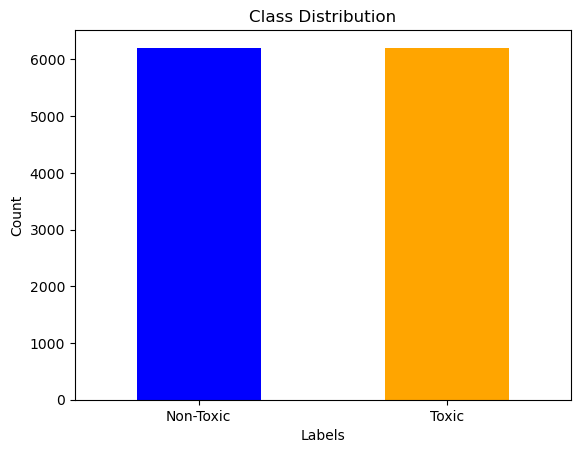

In [27]:
balanced_data['Toxicity Value'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Toxic', 'Toxic'], rotation=0)
plt.show()

In [50]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(balanced_data, test_size=0.2, stratify=balanced_data['Toxicity Value'])
print(train['Toxicity Value'].value_counts())
print(test['Toxicity Value'].value_counts())
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)
train = train.loc[:, ~train.columns.str.contains('^Unnamed')]
test = test.loc[:, ~test.columns.str.contains('^Unnamed')]

Toxicity Value
0    4964
1    4964
Name: count, dtype: int64
Toxicity Value
0    1241
1    1241
Name: count, dtype: int64


In [51]:
train

Canonical SMILES  \
0                            C[S+](C)CCC(N)C(=O)O.[Cl-]   
1          COc1ccc(C(=O)N2CCC3(CC2)CCN(c2ccccn2)CC3)cc1   
2              CC(=O)OCC(=O)NCCCOc1cccc(CN2CCCCC2)c1.Cl   
3            CC(=O)NCCNc1nc(-c2ccc(N(C)C)cc2)nc2ccccc12   
4             CCOCC(=O)Nc1cc(C(F)(F)F)ccc1Oc1cccc(Br)c1   
...                                                 ...   
9923            Fc1ccc(Nc2ccnc(-c3ccccc3C(F)(F)F)n2)cc1   
9924         CC(C)CN1CCC2(CC1)CCN(S(=O)(=O)c1ccccc1)CC2   
9925                                C=C[C@H](N)CCC(=O)O   
9926       O=C(CCS(=O)(=O)c1cccs1)N1CCN(c2ccc(F)cc2)CC1   
9927  C[C@]12CC[C@H](O)CC1=CC[C@@H]1[C@@H]2CC[C@]2(C...   

                                    Standardized_SMILES  Toxicity Value  
0                                  C[S+](C)CCC(N)C(=O)O               0  
1          COc1ccc(C(=O)N2CCC3(CC2)CCN(c2ccccn2)CC3)cc1               0  
2                 CC(=O)OCC(=O)NCCCOc1cccc(CN2CCCCC2)c1               1  
3            CC(=O)NCCNc1nc(-c2ccc(N(C)C)cc2)nc2ccccc12               0  
4             CCOCC(=O)Nc1cc(C(F)(F)F)ccc1Oc1cccc(Br)c1               1  
...                                                 ...             ...  
9923            Fc1ccc(Nc2ccnc(-c3ccccc3C(F)(F)F)n2)cc1               1  
9924         CC(C)CN1CCC2(CC1)CCN(S(=O)(=O)c1ccccc1)CC2               0  
9925                                C=C[C@H](N)CCC(=O)O               0  
9926       O=C(CCS(=O)(=O)c1cccs1)N1CCN(c2ccc(F)cc2)CC1               1  
9927  C[C@]12CC[C@H](O)CC1=CC[C@@H]1[C@@H]2CC[C@]2(C...               1  

[9928 rows x 3 columns]

In [52]:
test

Canonical SMILES  \
0                                    Clc1cc(Cl)cc(Cl)c1   
1     Cc1ccccc1-n1nc2c(c1NC(=O)c1c(-c3ccccc3Cl)noc1C...   
2     Cc1cccc(Nc2c([N+](=O)[O-])cc([N+](=O)[O-])c3cc...   
3     Nc1nc(=O)c2nc(CNc3ccc(C(=O)N[C@@H](CCC(=O)O)C(...   
4     COC(=O)[C@@]1(Cc2ccccc2)[C@H]2c3cc(C(=O)N(C)C)...   
...                                                 ...   
2477  OC1(C(O)(c2ccc(-c3ccccc3)cc2)c2ccc(-c3ccccc3)c...   
2478  CCCCCCCCCCCCCCCCCC(=O)O[C@H](CC(=O)O)C[N+](C)(C)C   
2479     CC(=O)c1cc2c(cc1NC(=O)c1c(-c3ccccc3)noc1C)OCO2   
2480                    O=C(O)CC(c1cccc2ccccc12)n1cccc1   
2481  COc1ccccc1CNc1nc(-c2cccc(NS(C)(=O)=O)c2)nc2ccc...   

                                    Standardized_SMILES  Toxicity Value  
0                                    Clc1cc(Cl)cc(Cl)c1               0  
1     Cc1ccccc1-n1nc2c(c1NC(=O)c1c(-c3ccccc3Cl)noc1C...               1  
2     Cc1cccc(Nc2c([N+](=O)[O-])cc([N+](=O)[O-])c3cc...               1  
3     Nc1nc(=O)c2nc(CNc3ccc(C(=O)N[C@@H](CCC(=O)O)C(...               1  
4     COC(=O)[C@@]1(Cc2ccccc2)[C@H]2c3cc(C(=O)N(C)C)...               1  
...                                                 ...             ...  
2477  OC1(C(O)(c2ccc(-c3ccccc3)cc2)c2ccc(-c3ccccc3)c...               0  
2478  CCCCCCCCCCCCCCCCCC(=O)O[C@H](CC(=O)O)C[N+](C)(C)C               0  
2479     CC(=O)c1cc2c(cc1NC(=O)c1c(-c3ccccc3)noc1C)OCO2               1  
2480                    O=C(O)CC(c1cccc2ccccc12)n1cccc1               0  
2481  COc1ccccc1CNc1nc(-c2cccc(NS(C)(=O)=O)c2)nc2ccc...               1  

[2482 rows x 3 columns]

In [53]:
train.to_csv('New_train.csv', index=False)
test.to_csv('New_val.csv', index=False)

In [54]:
testold = pd.read_csv("D:/PropPredictionModel/PropPredictionModel/tests/toxicity/data/test_tox_data.csv")
testold = testold.loc[:, ~testold.columns.str.contains('^Unnamed')]
testold

IDs                                             SMILES  \
0    NCGC00261443-01  CNC1=C2N=CN([C@@H]3O[C@H](CO)C(O)[C@H]3O)C2=NC=N1   
1    NCGC00261600-01            OC1=CC(\C=C\C2=CC=C(O)C(O)=C2)=CC(O)=C1   
2    NCGC00260926-01  [Cl-].COC1=CC=C2C3=CC=C4C=C5OCOC5=CC4=C3[N+](C...   
3    NCGC00261266-01                      Br.CC1=C(CC(N)C(O)=O)C(O)=NO1   
4    NCGC00261559-01      C1C(CC2=C1C=CC=C2)N3CCN(CC3)C4=CC=CC5=C4OCCO5   
..               ...                                                ...   
260  NCGC00261317-01                          COC1=C(O)C=CC(CC(O)=O)=C1   
261  NCGC00261138-01  CCCCCCN(CCCCCC)C(=O)CC1=C(NC2=C1C=CC=C2)C3=CC=...   
262  NCGC00261292-01                         Cl.NCCC1=CNC2=C1C=C(O)C=C2   
263  NCGC00260828-01  CC(\C=C\C=C(C)\C=C\C1=C(C)C(O)C(=O)CC1(C)C)=C\...   
264  NCGC00260687-01                        COC1=CC=C2NC3=C(CCNC3)C2=C1   

     Labels  
0         0  
1         1  
2         0  
3         0  
4         0  
..      ...  
260       0  
261       0  
262       0  
263       0  
264       0  

[265 rows x 3 columns]

In [55]:
testold['Canonical SMILES'] = testold['SMILES'].apply(validate_smiles)
testold_cleaned = testold.dropna(subset=['Canonical SMILES'])
print(len(testold_cleaned),len(testold))
testold_cleaned['Standardized_SMILES'] = testold_cleaned['Canonical SMILES'].apply(standardize_smiles_pipeline)
print(len(testold_cleaned))

265 265


[23:14:23] Initializing Normalizer
[23:14:23] Running Normalizer
[23:14:23] Running FragmentRemover
[23:14:23] Running Uncharger
[23:14:23] Initializing Normalizer
[23:14:23] Running Normalizer
[23:14:23] Running FragmentRemover
[23:14:23] Running Uncharger
[23:14:23] Initializing Normalizer
[23:14:23] Running Normalizer
[23:14:23] Running FragmentRemover
[23:14:23] Removed fragment: chlorine
[23:14:23] Running Uncharger
[23:14:23] Initializing Normalizer
[23:14:23] Running Normalizer
[23:14:23] Running FragmentRemover
[23:14:23] Removed fragment: bromine
[23:14:23] Running Uncharger
[23:14:23] Initializing Normalizer
[23:14:23] Running Normalizer
[23:14:23] Running FragmentRemover
[23:14:23] Running Uncharger
[23:14:24] Initializing Normalizer
[23:14:24] Running Normalizer
[23:14:24] Running FragmentRemover
[23:14:24] Removed fragment: chlorine
[23:14:24] Running Uncharger
[23:14:24] Initializing Normalizer
[23:14:24] Running Normalizer
[23:14:24] Running FragmentRemover
[23:14:24] Re

265


[23:14:25] Initializing Normalizer
[23:14:25] Running Normalizer
[23:14:25] Running FragmentRemover
[23:14:25] Running Uncharger
[23:14:25] Initializing Normalizer
[23:14:25] Running Normalizer
[23:14:25] Running FragmentRemover
[23:14:25] Running Uncharger
[23:14:25] Initializing Normalizer
[23:14:25] Running Normalizer
[23:14:25] Running FragmentRemover
[23:14:25] Running Uncharger
[23:14:25] Initializing Normalizer
[23:14:25] Running Normalizer
[23:14:25] Running FragmentRemover
[23:14:25] Running Uncharger
[23:14:25] Initializing Normalizer
[23:14:25] Running Normalizer
[23:14:25] Running FragmentRemover
[23:14:25] Removed fragment: zinc
[23:14:25] Running Uncharger
[23:14:25] Removed negative charge.
[23:14:25] Removed negative charge.
[23:14:25] Initializing Normalizer
[23:14:25] Running Normalizer
[23:14:25] Running FragmentRemover
[23:14:25] Running Uncharger
[23:14:25] Initializing Normalizer
[23:14:25] Running Normalizer
[23:14:25] Running FragmentRemover
[23:14:25] Running U

In [56]:
testold_cleaned

IDs                                             SMILES  \
0    NCGC00261443-01  CNC1=C2N=CN([C@@H]3O[C@H](CO)C(O)[C@H]3O)C2=NC=N1   
1    NCGC00261600-01            OC1=CC(\C=C\C2=CC=C(O)C(O)=C2)=CC(O)=C1   
2    NCGC00260926-01  [Cl-].COC1=CC=C2C3=CC=C4C=C5OCOC5=CC4=C3[N+](C...   
3    NCGC00261266-01                      Br.CC1=C(CC(N)C(O)=O)C(O)=NO1   
4    NCGC00261559-01      C1C(CC2=C1C=CC=C2)N3CCN(CC3)C4=CC=CC5=C4OCCO5   
..               ...                                                ...   
260  NCGC00261317-01                          COC1=C(O)C=CC(CC(O)=O)=C1   
261  NCGC00261138-01  CCCCCCN(CCCCCC)C(=O)CC1=C(NC2=C1C=CC=C2)C3=CC=...   
262  NCGC00261292-01                         Cl.NCCC1=CNC2=C1C=C(O)C=C2   
263  NCGC00260828-01  CC(\C=C\C=C(C)\C=C\C1=C(C)C(O)C(=O)CC1(C)C)=C\...   
264  NCGC00260687-01                        COC1=CC=C2NC3=C(CCNC3)C2=C1   

     Labels                                   Canonical SMILES  \
0         0  CNC1=C2N=CN([C@@H]3O[C@H](CO)C(O)[C@H]3O)C2=NC=N1   
1         1            OC1=CC(\C=C\C2=CC=C(O)C(O)=C2)=CC(O)=C1   
2         0  [Cl-].COC1=CC=C2C3=CC=C4C=C5OCOC5=CC4=C3[N+](C...   
3         0                      Br.CC1=C(CC(N)C(O)=O)C(O)=NO1   
4         0      C1C(CC2=C1C=CC=C2)N3CCN(CC3)C4=CC=CC5=C4OCCO5   
..      ...                                                ...   
260       0                          COC1=C(O)C=CC(CC(O)=O)=C1   
261       0  CCCCCCN(CCCCCC)C(=O)CC1=C(NC2=C1C=CC=C2)C3=CC=...   
262       0                         Cl.NCCC1=CNC2=C1C=C(O)C=C2   
263       0  CC(\C=C\C=C(C)\C=C\C1=C(C)C(O)C(=O)CC1(C)C)=C\...   
264       0                        COC1=CC=C2NC3=C(CCNC3)C2=C1   

                                   Standardized_SMILES  
0          CNc1ncnc2c1ncn2[C@@H]1O[C@H](CO)C(O)[C@H]1O  
1                    Oc1cc(O)cc(/C=C/c2ccc(O)c(O)c2)c1  
2        COc1ccc2c(c[n+](C)c3c4cc5c(cc4ccc23)OCO5)c1OC  
3                               Cc1onc(O)c1CC(N)C(=O)O  
4            c1ccc2c(c1)CC(N1CCN(c3cccc4c3OCCO4)CC1)C2  
..                                                 ...  
260                               COc1cc(CC(=O)O)ccc1O  
261  CCCCCCN(CCCCCC)C(=O)Cc1c(-c2ccc(F)cc2)[nH]c2cc...  
262                             NCCc1c[nH]c2ccc(O)cc12  
263  CC1=C(/C=C/C(C)=C/C=C/C(C)=C\C=C\C=C(C)/C=C/C=...  
264                         COc1ccc2[nH]c3c(c2c1)CCNC3  

[265 rows x 5 columns]

In [57]:
testold_cleaned = testold_cleaned[['Canonical SMILES','Standardized_SMILES','Labels']]
testold_cleaned = testold_cleaned.rename(columns={'Labels': 'Toxicity Value'})
testold_cleaned

Canonical SMILES  \
0    CNC1=C2N=CN([C@@H]3O[C@H](CO)C(O)[C@H]3O)C2=NC=N1   
1              OC1=CC(\C=C\C2=CC=C(O)C(O)=C2)=CC(O)=C1   
2    [Cl-].COC1=CC=C2C3=CC=C4C=C5OCOC5=CC4=C3[N+](C...   
3                        Br.CC1=C(CC(N)C(O)=O)C(O)=NO1   
4        C1C(CC2=C1C=CC=C2)N3CCN(CC3)C4=CC=CC5=C4OCCO5   
..                                                 ...   
260                          COC1=C(O)C=CC(CC(O)=O)=C1   
261  CCCCCCN(CCCCCC)C(=O)CC1=C(NC2=C1C=CC=C2)C3=CC=...   
262                         Cl.NCCC1=CNC2=C1C=C(O)C=C2   
263  CC(\C=C\C=C(C)\C=C\C1=C(C)C(O)C(=O)CC1(C)C)=C\...   
264                        COC1=CC=C2NC3=C(CCNC3)C2=C1   

                                   Standardized_SMILES  Toxicity Value  
0          CNc1ncnc2c1ncn2[C@@H]1O[C@H](CO)C(O)[C@H]1O               0  
1                    Oc1cc(O)cc(/C=C/c2ccc(O)c(O)c2)c1               1  
2        COc1ccc2c(c[n+](C)c3c4cc5c(cc4ccc23)OCO5)c1OC               0  
3                               Cc1onc(O)c1CC(N)C(=O)O               0  
4            c1ccc2c(c1)CC(N1CCN(c3cccc4c3OCCO4)CC1)C2               0  
..                                                 ...             ...  
260                               COc1cc(CC(=O)O)ccc1O               0  
261  CCCCCCN(CCCCCC)C(=O)Cc1c(-c2ccc(F)cc2)[nH]c2cc...               0  
262                             NCCc1c[nH]c2ccc(O)cc12               0  
263  CC1=C(/C=C/C(C)=C/C=C/C(C)=C\C=C\C=C(C)/C=C/C=...               0  
264                         COc1ccc2[nH]c3c(c2c1)CCNC3               0  

[265 rows x 3 columns]

In [58]:
common_entries = pd.merge(train, testold_cleaned, on=['Canonical SMILES', 'Standardized_SMILES'], how='inner')
# Display the common entries
common_entries

Canonical SMILES  Standardized_SMILES  Toxicity Value_x  \
0  CC1(C)CCC=[N+]1[O-]  CC1(C)CCC=[N+]1[O-]                 0   

   Toxicity Value_y  
0                 0

In [59]:
common_entries = pd.merge(test, testold_cleaned, on=['Canonical SMILES', 'Standardized_SMILES'], how='inner')

# Display the common entries
common_entries

Empty DataFrame
Columns: [Canonical SMILES, Standardized_SMILES, Toxicity Value_x, Toxicity Value_y]
Index: []

In [60]:
testold_cleaned = testold_cleaned[testold_cleaned['Standardized_SMILES'] != "CC1(C)CCC=[N+]1[O-]"]

In [61]:
testold_cleaned.to_csv("New_test.csv", index=False)

In [62]:
train

Canonical SMILES  \
0                            C[S+](C)CCC(N)C(=O)O.[Cl-]   
1          COc1ccc(C(=O)N2CCC3(CC2)CCN(c2ccccn2)CC3)cc1   
2              CC(=O)OCC(=O)NCCCOc1cccc(CN2CCCCC2)c1.Cl   
3            CC(=O)NCCNc1nc(-c2ccc(N(C)C)cc2)nc2ccccc12   
4             CCOCC(=O)Nc1cc(C(F)(F)F)ccc1Oc1cccc(Br)c1   
...                                                 ...   
9923            Fc1ccc(Nc2ccnc(-c3ccccc3C(F)(F)F)n2)cc1   
9924         CC(C)CN1CCC2(CC1)CCN(S(=O)(=O)c1ccccc1)CC2   
9925                                C=C[C@H](N)CCC(=O)O   
9926       O=C(CCS(=O)(=O)c1cccs1)N1CCN(c2ccc(F)cc2)CC1   
9927  C[C@]12CC[C@H](O)CC1=CC[C@@H]1[C@@H]2CC[C@]2(C...   

                                    Standardized_SMILES  Toxicity Value  
0                                  C[S+](C)CCC(N)C(=O)O               0  
1          COc1ccc(C(=O)N2CCC3(CC2)CCN(c2ccccn2)CC3)cc1               0  
2                 CC(=O)OCC(=O)NCCCOc1cccc(CN2CCCCC2)c1               1  
3            CC(=O)NCCNc1nc(-c2ccc(N(C)C)cc2)nc2ccccc12               0  
4             CCOCC(=O)Nc1cc(C(F)(F)F)ccc1Oc1cccc(Br)c1               1  
...                                                 ...             ...  
9923            Fc1ccc(Nc2ccnc(-c3ccccc3C(F)(F)F)n2)cc1               1  
9924         CC(C)CN1CCC2(CC1)CCN(S(=O)(=O)c1ccccc1)CC2               0  
9925                                C=C[C@H](N)CCC(=O)O               0  
9926       O=C(CCS(=O)(=O)c1cccs1)N1CCN(c2ccc(F)cc2)CC1               1  
9927  C[C@]12CC[C@H](O)CC1=CC[C@@H]1[C@@H]2CC[C@]2(C...               1  

[9928 rows x 3 columns]

In [63]:
train = train.rename(columns={'Canonical SMILES': 'Canonical_SMILES', 'Toxicity Value': 'Toxicity_Value'})
val = test.rename(columns={'Canonical SMILES': 'Canonical_SMILES', 'Toxicity Value': 'Toxicity_Value'})
test = testold_cleaned.rename(columns={'Canonical SMILES': 'Canonical_SMILES', 'Toxicity Value': 'Toxicity_Value'})

In [64]:
len(train),len(val),len(test)

(9928, 2482, 264)

In [65]:
train.to_csv('New_train.csv', index=False)
val.to_csv('New_val.csv', index=False)
test.to_csv('New_test.csv', index=False)

In [66]:
pwd

'D:\\Equivarance_property_prediction\\notebooks'